# Scene Detection in Movies and TV shows
implementation of the paper [Rasheed, et al. “Scene detection in Hollywood movies and tv shows” Proc. of IEEE Computer Society Conference on Computer Vision and Pattern Recognition, vol. 2, pp. 343-348, 2003](https://www.crcv.ucf.edu/papers/Scene-segCVPR2003.pdf)

## Read input data and Color shot detection

In [229]:
# import required module
from pathlib import Path
import cv2
import numpy as np
FILE = 'news_out' #'ftfm_out'# 'climate_out'  
GROUND_FILE = 'news_ground.txt'# 'ftfm_ground.txt' # 'climate_ground.txt'

In [51]:
threshold = 0.9
min_shot_duration = 10 # in frames

In [3]:
# iterate over files in that directory
files = [str(p) for p in Path(FILE).glob('*')]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
hist_list = []
for frame_path in files:
    frame = cv2.imread(frame_path)
    # Compute color histogram
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([frame], [0, 1, 2], None, [8, 4, 4], [0, 180, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX).flatten()
    hist_list.append(hist)
    
print(len(hist_list))

1780


In [4]:
# # test filter and sort function
# files_test = [str(p) for p in Path(directory).glob('*')]
# files_test.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))

# howard = list(filter(str.isdigit, "002sfi4"))
# print(howard)

In [5]:
# ## Read video
# cap = cv2.VideoCapture('climate.mp4')
# hist_list = []
# ## make histogram of every frame
# while(cap.isOpened()):
#     ret, frame = cap.read()
#     if ret == True:
#         # Compute color histogram
#         frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
#         hist = cv2.calcHist([frame], [0, 1, 2], None, [8, 4, 4], [0, 180, 0, 256, 0, 256])
#         # print("new\nhist:{}\n".format(hist.shape))
#         hist = cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX).flatten()
#         # print(hist)
#         # print("end")
#         hist_list.append(hist)
#     else:
#         break
    
# print(len(hist_list))

In [6]:
shot_boundaries = []
for i in range(1, len(hist_list)):
    # Compute histogram difference
    diff = cv2.compareHist(hist_list[i-1], hist_list[i], cv2.HISTCMP_CORREL)
    if diff < threshold:
        shot_boundaries.append(i+1)
print(shot_boundaries)

[93, 157, 232, 314, 355, 460, 691, 697, 886, 900, 919, 1021, 1237, 1401, 1555]


In [7]:
shot_lengths = np.diff(shot_boundaries)
short_shots = np.where(shot_lengths < min_shot_duration)[0]

print(shot_boundaries)

[93, 157, 232, 314, 355, 460, 691, 697, 886, 900, 919, 1021, 1237, 1401, 1555]


In [8]:

for i in reversed(short_shots):
    if i == len(shot_boundaries)-1:
        shot_boundaries = shot_boundaries[:i+1]
    else:
        shot_boundaries = shot_boundaries[:i+1] + shot_boundaries[i+2:]
print(shot_boundaries)

[93, 157, 232, 314, 355, 460, 691, 886, 900, 919, 1021, 1237, 1401, 1555]


## SIFT way

## test for 1 image

In [230]:
# iterate over files in that directory
files = [str(p) for p in Path(FILE).glob('*')]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
sift_list = []
for frame_path in files:
    frame = cv2.imread(frame_path)
    # Compute color histogram
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    sift_list.append([])
    
print(len(sift_list))

1380


In [231]:
files = [str(p) for p in Path(FILE).glob('*')]

In [232]:
sift = cv2.SIFT_create(nfeatures=0, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6)
frame = cv2.imread(files[148])
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

keypoints, descriptors = sift.detectAndCompute(frame_gray, None)

# for keypoint,descriptor in zip(keypoints, descriptors):
#     print("keypoint:", keypoint.angle, keypoint.class_id, keypoint.octave, keypoint.pt, keypoint.response, keypoint.size)
#     print("descriptor: ", descriptor.shape)

img = cv2.drawKeypoints(image=frame_gray, outImage=frame, keypoints=keypoints,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
                        color=(51, 163, 236))

cv2.imwrite("images/origin_gray.png", frame_gray)
cv2.imwrite("images/sift_example.png", frame)

# from matplotlib import pyplot as plt
# plt.figure()
# f, axarr = plt.subplots(2,1) 
# axarr[0].imshow(frame_gray)
# axarr[1].imshow(frame)

True

## Test matching

In [285]:
import cv2
import numpy as np

#自己绘制匹配连线
def drawMatchesKnn_cv2(img1, kp1, img2, kp2, goodMatch):
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    vis = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
    vis[:h1, :w1] = img1
    vis[:h2, w1:w1 + w2] = img2

    p1 = [kpp.queryIdx for kpp in goodMatch]
    p2 = [kpp.trainIdx for kpp in goodMatch]
    post1 = np.int32([kp1[pp].pt for pp in p1])
    post2 = np.int32([kp2[pp].pt for pp in p2]) + (w1, 0)
    for (x1, y1), (x2, y2) in zip(post1, post2):
        cv2.line(vis, (x1, y1), (x2, y2), (0, 0, 255))
    cv2.imshow("match", vis)

files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
img1 = cv2.imread(files[72])
img2 = cv2.imread(files[73])
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
print(len(kp1))
print(len(kp2))
max_kp = max(len(kp1), len(kp2))
# 采用暴力匹配
matcher = cv2.BFMatcher()
matches = matcher.knnMatch(des1, des2, k=2)  # k=2,表示寻找两个最近邻

# 采用最近邻近似匹配
# FLANN_INDEX_KDTREE = 0  # 建立FLANN匹配器的参数
# indexParams = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)  # 配置索引，密度树的数量为5
# searchParams = dict(checks=50)  # 指定递归次数
# matcher = cv2.FlannBasedMatcher(indexParams, searchParams)  # 建立FlannBasedMatcher对象
# matches = matcher.knnMatch(des1, des2, k=2)  # k=2,表示寻找两个最近邻

h1, w1 = img1.shape[:2]
h2, w2 = img2.shape[:2]

out_img1 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img1[:h1, :w1] = img1
out_img1[:h2, w1:w1 + w2] = img2
out_img1 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, matches, out_img1)

distance_group = [match[0].distance for match in matches]# [m.distance for m in matches]

good_match = []
for m, n in matches:
    # if m.distance < 0.5 * n.distance: # 如果第一个邻近距离比第二个邻近距离的0.5倍小，则保留
    #     good_match.append(m)
    if m.distance < 200:    
        good_match.append(m)

out_img2 = np.zeros((max(h1, h2), w1 + w2, 3), np.uint8)
out_img2[:h1, :w1] = img1
out_img2[:h2, w1:w1 + w2] = img2
# p1 = [kp1[kpp.queryIdx] for kpp in good_match]  # kp1中挑选处的关键点
# p2 = [kp2[kpp.trainIdx] for kpp in good_match]  # kp2中挑选处的关键点
out_img2 = cv2.drawMatches(img1, kp1, img2, kp2, good_match, out_img2)

print(len(matches))
print(len(good_match)/max_kp)


cv2.imwrite("images/out_img1.png", out_img1)
cv2.imwrite("images/out_img2.png", out_img2)


1310
1360
1310
0.28602941176470587


True

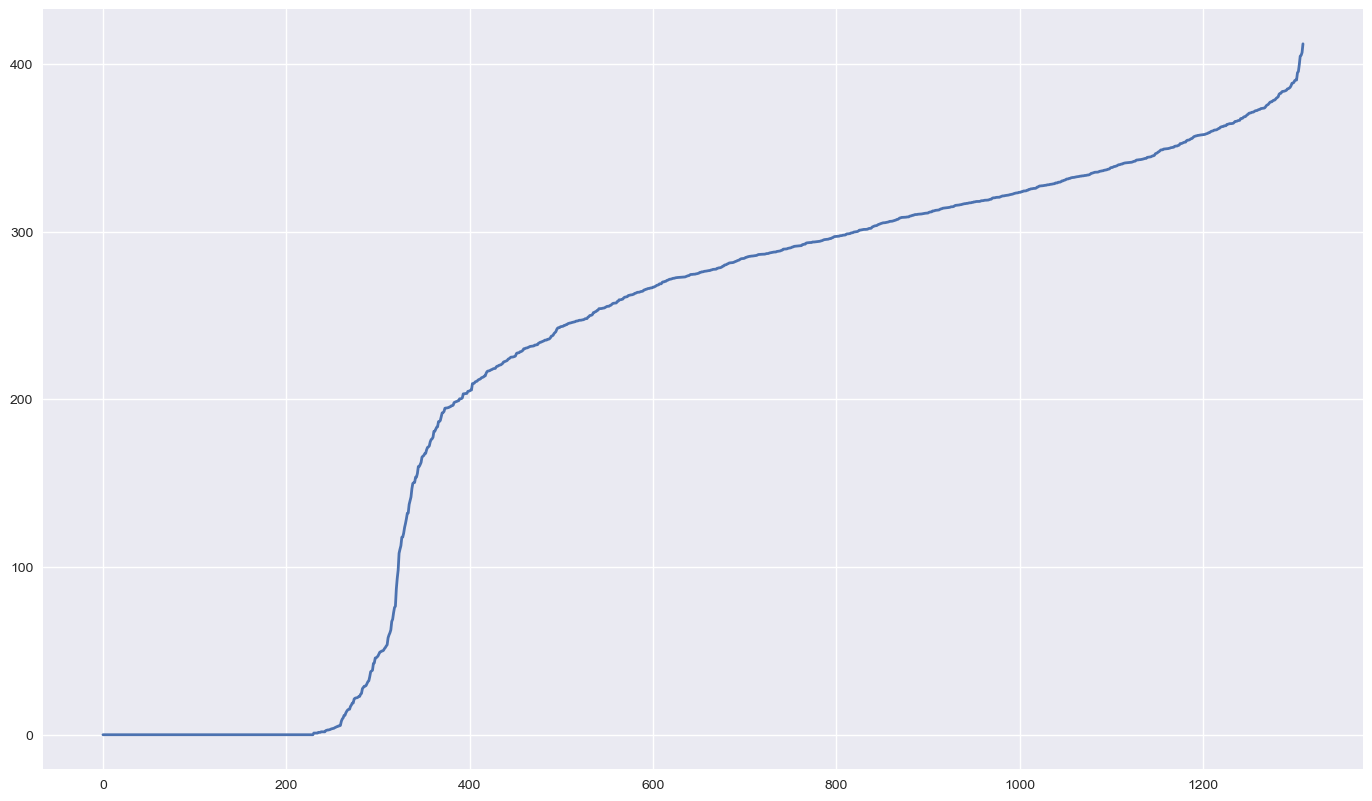

In [286]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
# plot pre vs recall
distance_group.sort()
fig, ax = plt.subplots()
ax.plot(range(len(distance_group)),distance_group, linewidth=2.0)

fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.2)
fig.set_size_inches(16.5, 9.5)
fig.savefig("images/distance.png", dpi=100)
# ax.set(xlim=(0, 8), xticks=np.arange(1, 8), ylim=(0, 8), yticks=np.arange(1, 8))

## Run through All match judging shot with ratio

In [343]:
import cv2
import numpy as np

THRESHOLD_DISTANCE = 270
THRESHOLD_RATE = 0.6

In [288]:
# iterate over files in that directory
files = [str(p) for p in Path(FILE).glob('*')]
files.sort(key=lambda f: int(''.join(filter(str.isdigit, f))))
sift = cv2.SIFT_create()

kp_list = []
des_list = []

for frame_path in files:
    frame = cv2.imread(frame_path)
    # Compute color histogram
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    kp, des = sift.detectAndCompute(frame, None)
    kp_list.append(kp)
    des_list.append(des)
    
print(len(kp_list))

1380


In [344]:
matcher = cv2.BFMatcher()

shot_boundaries = []
for i in range(1, len(des_list)):
    # Compute matches
    max_kp = max(len(kp_list[i-1]), len(kp_list[i]))
    min_kp = min(len(kp_list[i-1]), len(kp_list[i]))
    if max_kp<10 or min_kp < 10:
        shot_boundaries.append(i+1)
        continue
    matches = matcher.knnMatch(des_list[i-1], des_list[i], k=1)  # k=1,表示寻找两个最近邻
    good_match = []
    for m in matches:
        if m[0].distance < THRESHOLD_DISTANCE:
            good_match.append(m)
    if (len(good_match)/max_kp) < THRESHOLD_RATE:
        shot_boundaries.append(i)

print(shot_boundaries)

[73, 75, 76, 90, 91, 105, 106, 120, 121, 135, 136, 150, 151, 165, 166, 180, 181, 195, 196, 210, 211, 225, 226, 235, 301, 370, 452, 861, 1281, 1290, 1291, 1305, 1306, 1320, 1321, 1335, 1336, 1350, 1351, 1365, 1366]


In [345]:
shot_lengths = np.diff(shot_boundaries)
short_shots = np.where(shot_lengths < min_shot_duration)[0]

for i in reversed(short_shots):
    if i == len(shot_boundaries)-1:
        shot_boundaries = shot_boundaries[:i+1]
    else:
        shot_boundaries = shot_boundaries[:i+1] + shot_boundaries[i+2:]
print(shot_boundaries)

[73, 90, 105, 120, 135, 150, 165, 180, 195, 210, 225, 301, 370, 452, 861, 1281, 1305, 1320, 1335, 1350, 1365]


## Read ground truth file

In [346]:
ground_file = open(GROUND_FILE, "r")
ground_data = ground_file.read()
ground_list = ground_data.split("\n")
ground_file.close()


In [347]:
ground_list = ground_list[4:]

In [348]:
for i in range(len(ground_list)):
    if '~' in ground_list[i]:
        print(ground_list[i])
        first, second = ground_list[i].split("~")
        ground_list[i] = (first, second)

In [349]:
print(ground_list)

['73', '235', '301', '370', '452', '861', '1281']


In [350]:
true_positive = 0
false_positive = 0
false_negative = 0
true_negative = 0

for shot in shot_boundaries:
    hit = 0
    for number in ground_list:
        if type(number) is tuple:
            (first ,second ) = number
            if int(first) <= shot <= int(second):
                true_positive += 1
                hit = 1
                break
        else:
            if shot == int(number):
                true_positive += 1
                hit = 1
                break
            
    if hit == 0:
        false_positive += 1

In [351]:
print(true_positive, false_positive)

6 15


In [352]:
for number in ground_list:
    hit = 0
    for shot in shot_boundaries:
        if type(number) is tuple:
            (first ,second) = number
            if int(first) <= shot <= int(second):
                hit = 1
                break
        else:
            if shot == int(number):
                hit = 1
                break
    if hit == 0:
        false_negative += 1

In [353]:
true_negative = len(files) - len(shot_boundaries) - false_negative

In [354]:
print(false_negative, true_negative)

1 1358


In [355]:
if (true_positive + false_positive)==0:
    precision = 0
else:
    precision = true_positive/(true_positive + false_positive)
if (true_positive + false_negative)==0:
    recall = 0
else:
    recall = true_positive/(true_positive + false_negative)
print(precision, recall)

0.2857142857142857 0.8571428571428571
